# Normal Multivariada

En este cuaderno se simula la normal multivariada y se analiza la sensibilidad a los parámetros.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import random
import math
from mpl_toolkits.mplot3d import Axes3D

**Pseudo-Código para simular una Normal Multivariada**

Dados un vector de medias $\bar{\mu}$ y una matriz de varianzas y covarianzas $\Sigma$, nos interesa simluar $ X \sim \mathcal{N}_d(\bar{\mu} , \Sigma)$.

1. Simular $Z_i \sim \mathcal{N}(0,1)$ para $i = 1, 2, ..., d$ y definir $Z = (Z_1, Z_2, ..., Z_d)$.
2. Obtenemos $A$ triangular inferior tal que $\Sigma = A A^t$.
3. Calculamos $X = AZ + \bar{\mu} \sim \mathcal{N}_d(\bar{\mu} , \Sigma)$

A continuación una función que hace este procedimiento

In [28]:
def simular_normal_multivariada(mu, Sigma):
  d = len(mu)
  Z = np.random.randn(d)
  A = np.linalg.cholesky(Sigma) # A tal que cumple 3
  X = A @ Z + mu
  return X

simular_normal_multivariada([0, 0, 0],
                            [[1, 0.8, 0.3], [0.8, 1, 0.5], [0.3, 0.5, 1]])

array([ 0.19110489, -0.38826831, -1.25803897])

Ahora hacemos muestras y las visualizamos en el plano

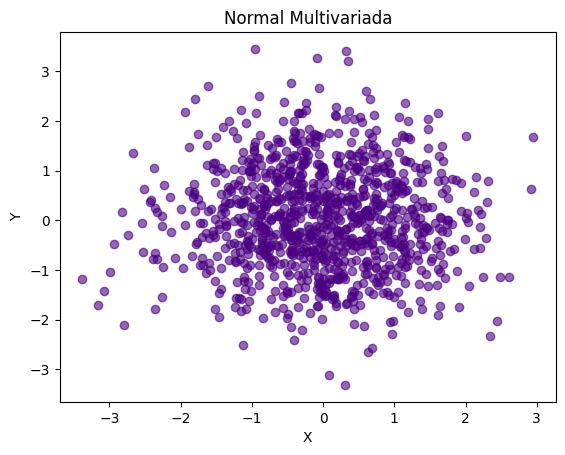

In [29]:
# Ejemplo 1
mu1 = [0,0,0]
sigma1 = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
muestra1 = [simular_normal_multivariada(mu1, sigma1) for _ in range(1000)]

# Gráfico de la muestra
plt.figure()
plt.scatter([x[0] for x in muestra1], [x[1] for x in muestra1], alpha = 0.6, color = 'indigo')
plt.title('Normal Multivariada')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Ahora hacemos una función que grafica una muestra de la normal multivariada

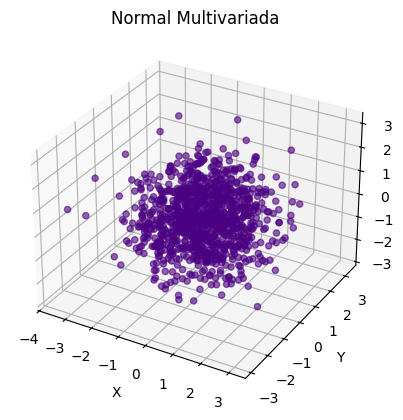

In [30]:
def graficar_normal_multivariada(mu, Sigma):
  n = len(mu)
  muestra1 = [simular_normal_multivariada(mu1, sigma1) for _ in range(1000)]
  if n == 2:
    plt.figure()
    plt.scatter([x[0] for x in muestra1], [x[1] for x in muestra1], alpha = 0.6, color = 'indigo')
    plt.title('Normal Multivariada')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
  if n == 3:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter([x[0] for x in muestra1], [x[1] for x in muestra1], [x[2] for x in muestra1], alpha = 0.6, color = 'indigo')
    plt.title('Normal Multivariada')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

graficar_normal_multivariada([0,0,0], [[1, 0, 0], [0, 1, 0], [0, 0, 1]])


Podemos ver la densidad de la normal bivariada al evaluar cada punto obtenido en la densidad, lo cual se presenta a continuación. Recordemos que la normal bivariada tiene la siguiente función de densidad

$$
f(x,y) = \frac{1}{2\pi\sqrt{1-\rho^2}}
\exp\left(
-\frac{1}{2(1-\rho^2)}
\left( x^2 - 2\rho xy + y^2 \right)
\right).
$$

La idea es simple: hacer una malla de puntos en el plano $xy$ y en cada uno evaluar la función de densidad $f$

Este procedimiento se muestra a continuación.

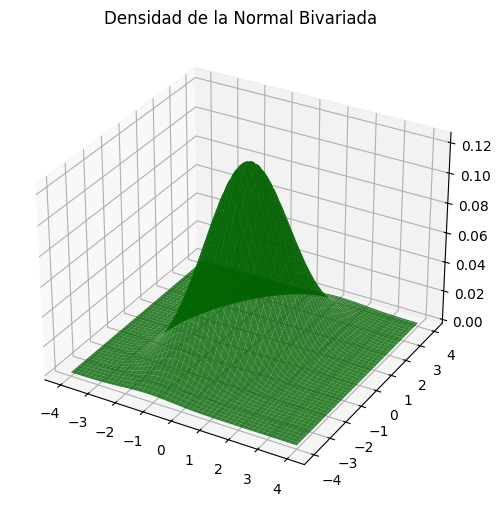

In [33]:
def densidad_normal_bivariada_cov(x, y, mean, cov):
    X = np.array([x, y])
    mu = np.array(mean)
    det = np.linalg.det(cov)
    inv = np.linalg.inv(cov)
    diff = X - mu
    exponente = -0.5 * diff @ inv @ diff
    return 1/(2*np.pi*np.sqrt(det)) * np.exp(exponente)

# Parámetros
mean = [0, 0]
cov = np.array([[1, 0.6], [0.6, 2]])

# Malla de puntos
x = np.linspace(-4, 4, 100)
y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(x, y)

# Evaluar densidad
Z = np.zeros_like(X)
for i in range(len(x)):
    for j in range(len(y)):
        Z[i,j] = densidad_normal_bivariada_cov(X[i,j], Y[i,j], mean, cov)

# Gráfica
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, linewidth=0, antialiased=True, alpha = 0.8, color = 'green')
ax.set_title("Densidad de la Normal Bivariada")
plt.show()


Finalmente, una función que hace todo este proceso

In [40]:
def graficar_densidad_normal_bivariada(mu, sigma):
  x_min = mu[0] - 4 * np.sqrt(sigma[0,0])
  x_max = mu[0] + 4 * np.sqrt(sigma[0,0])
  y_min = mu[1] - 4 * np.sqrt(sigma[1,1])
  y_max = mu[1] + 4 * np.sqrt(sigma[1,1])

  # Malla
  x = np.linspace(x_min, x_max, 200)
  y = np.linspace(y_min, y_max, 200)
  X, Y = np.meshgrid(x, y)

  # Evaluar densidad
  Z = np.zeros_like(X)
  for i in range(len(x)):
      for j in range(len(y)):
          Z[i,j] = densidad_normal_bivariada_cov(X[i,j], Y[i,j], mean, sigma)

  # Gráfica
  fig = plt.figure(figsize=(10,6))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(X, Y, Z, linewidth=0, antialiased=True, alpha = 0.8, color = 'navy')
  ax.set_title("Densidad de la Normal Bivariada")
  plt.show()

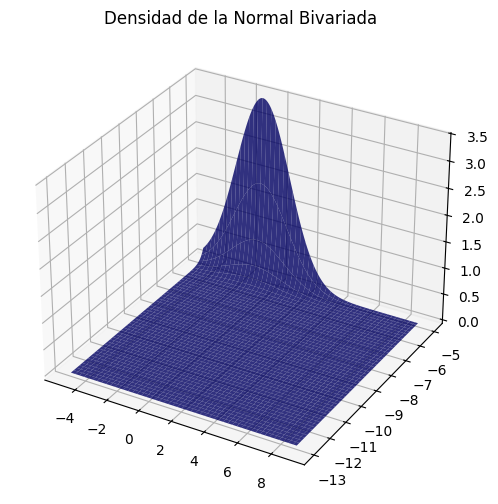

In [41]:
mu2 = [2,-9]
sigma2 = np.array([[3, 0.2], [0.2, 1]])

graficar_densidad_normal_bivariada(mu2, sigma2)

Esta función es muy útil.